## Telecom case study -- Version 0.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
telecom_orig_df = pd.read_csv('telecom_churn_data.csv')

In [4]:
print('No. of rows and columns: ',telecom_orig_df.shape)


No. of rows and columns:  (99999, 226)


In [5]:
temp_df = telecom_orig_df.describe(include="all")

In [6]:
empty_cols = ['loc_og_t2o_mou','loc_og_t2o_mou','loc_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_8','loc_og_t2o_mou','loc_og_t2o_mou']
temp_df[empty_cols]

,loc_og_t2o_mou,loc_og_t2o_mou,loc_og_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_8,loc_og_t2o_mou,loc_og_t2o_mou
count,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,94621.0,98981.0,98981.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### droping the cols which has no value or only zero

In [7]:
tel_work_df = telecom_orig_df[telecom_orig_df.columns.difference(empty_cols)]

In [8]:
current_cols = tel_work_df.columns
current_cols.tolist()

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_

### lets see the data for futhur analysis


In [15]:
def getColName(lst,containsStr):
    str_cols = [col for col in lst if(col.find(containsStr) != -1) ]
    return str_cols

In [9]:
date_cols = [col for col in current_cols.tolist() if(col.find('date') != -1) ]
#print('no. of empty date cols:',tel_work_df[date_cols].isna().sum())
#tel_work_df[date_cols].fillna('NA',inplace=True,axis=1)
#print('no. of empty date after replace cols:',tel_work_df[date_cols].isin(['NA']).sum())
tel_work_df[date_cols] = tel_work_df[date_cols].astype(np.str)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


#### fill empty values

In [10]:
tel_work_df.describe()

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,circle_id,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2o_mou,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,mobile_number,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2o_mou,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
count,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.0,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140

In [12]:
NA_cols_pd = pd.concat([tel_work_df.isna().sum() ,(tel_work_df.isna().sum()/len(tel_work_df))*100],axis=1)
NA_cols_pd.reset_index(inplace=True)
NA_cols_pd.rename(columns={'index':'columnName',0:'na_count',1:'pct_na_count'},inplace=True)
NA_cols_pd = NA_cols_pd[NA_cols_pd['na_count'] > 0]
missing_unique_pct = NA_cols_pd['pct_na_count'].unique().tolist()

###  The column has more than 74% of empty value will be replace with zero

In [13]:
for missing_pct_col in missing_unique_pct:
    missing_cols = NA_cols_pd[NA_cols_pd['pct_na_count'] == missing_pct_col]['columnName'].tolist()
    print('The missing ',missing_pct_col,'%', ' cols are :',missing_cols)
    print()
    for col in missing_cols:
        tel_work_df[[col]] = tel_work_df[[col]].fillna(value=0)


The missing  74.84674846748467 %  cols are : ['arpu_2g_6', 'arpu_3g_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'fb_user_6', 'max_rech_data_6', 'night_pck_user_6', 'total_rech_data_6']



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


The missing  74.42874428744287 %  cols are : ['arpu_2g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'total_rech_data_7']

The missing  73.66073660736608 %  cols are : ['arpu_2g_8', 'arpu_3g_8', 'av_rech_amt_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'fb_user_8', 'max_rech_data_8', 'night_pck_user_8', 'total_rech_data_8']

The missing  74.07774077740777 %  cols are : ['arpu_2g_9', 'arpu_3g_9', 'av_rech_amt_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'night_pck_user_9', 'total_rech_data_9']

The missing  3.9370393703937037 %  cols are : ['ic_others_6', 'isd_ic_mou_6', 'isd_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_6', 'offnet_mou_6', 'og_others_6', 'onnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'spl_ic_mou_6', 'spl_og_mou_6', 'std

In [16]:
print(getColName(tel_work_df.columns.tolist(),'rech'))

['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9']


In [17]:
tel_work_df['aver_rech'] = tel_work_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Selecting and filtering the high value customers. 

In [21]:
#tel_work_df['aver_rech_67'] = (tel_work_df['total_rech_amt_6'] +  tel_work_df['total_rech_amt_7'])/2
var_70th_perc = tel_work_df['aver_rech'].quantile(0.7)
print(var_70th_perc)
high_value_customer =tel_work_df.loc[(tel_work_df['aver_rech'] > var_70th_perc) ]

print('high_value_customer =',high_value_customer.shape)


368.5
high_value_customer = (29979, 219)


### lets work on the date cols

In [22]:
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9']

In [23]:
high_value_customer['date_of_last_rech_6'].unique()

array(['6/27/2014', '6/25/2014', '6/20/2014', '6/30/2014', '6/23/2014',
       '6/24/2014', '6/29/2014', '6/28/2014', '6/26/2014', '6/21/2014',
       '6/17/2014', '6/22/2014', '6/13/2014', '6/16/2014', '6/12/2014',
       '6/15/2014', '6/18/2014', '6/8/2014', '6/19/2014', '6/2/2014',
       '6/7/2014', '6/4/2014', '6/14/2014', '6/11/2014', 'nan',
       '6/9/2014', '6/10/2014', '6/3/2014', '6/5/2014', '6/1/2014',
       '6/6/2014'], dtype=object)

# need to see how to impute the date values???

In [24]:
rech_date = high_value_customer[(high_value_customer['date_of_last_rech_6']== 'nan') | (high_value_customer['date_of_last_rech_7']== 'nan')]

In [25]:
rech_date[['total_rech_amt_6','total_rech_amt_7']].head()

,total_rech_amt_6,total_rech_amt_7
490,786,0
603,1001,0
679,980,0
1374,1047,0
1555,986,0


### Lets find the "Good" and "Action" coutomer

In [21]:
getColName(high_value_customer.columns.tolist(),'arpu')

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9']

In [26]:
high_value_customer['action_arup_2g'] = high_value_customer.apply(lambda x: 0 if(x['arpu_2g_8'] >= ((x['arpu_2g_6']+ x['arpu_2g_7'])/2)) else 1,axis=1)
high_value_customer['action_arup_3g'] = high_value_customer.apply(lambda x: 0 if(x['arpu_3g_8'] >= ((x['arpu_3g_6']+ x['arpu_3g_7'])/2)) else 1,axis=1)
high_value_customer['action_arup'] = high_value_customer.apply(lambda x: 0 if(x['arpu_8'] >= ((x['arpu_6']+ x['arpu_7'])/2)) else 1,axis=1)
high_value_customer['action_arup_trend_6_7'] = high_value_customer.apply(lambda x: 0 if(0 >= ((x['arpu_7']- x['arpu_6'])/2)) else 1,axis=1)
high_value_customer['action_arup_trend_7_8'] = high_value_customer.apply(lambda x: 0 if(0 >= ((x['arpu_7']- x['arpu_8'])/2)) else 1,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [27]:
high_value_customer['action_arup'].unique()

array([0, 1], dtype=int64)

In [29]:
getColName(high_value_customer.columns.tolist(),'ic')

['ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_mou_9',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2o_mou',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2t_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'spl_ic_mou_9',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_ic_mou_9',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_9',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_9',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic

In [30]:
high_value_customer['action_total_ic_mou'] = high_value_customer.apply(lambda x: 0 if(x['total_ic_mou_8'] >= ((x['total_ic_mou_6']+ x['total_ic_mou_7'])/2)) else 1,axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### outgoing


In [26]:
high_value_customer['action_total_og_mou'] = high_value_customer.apply(lambda x: 0 if(x['total_og_mou_8'] >= ((x['total_og_mou_6']+ x['total_og_mou_7'])/2)) else 1,axis=1)
high_value_customer['action_total_vol_2g'] = high_value_customer.apply(lambda x: 0 if(x['vol_2g_mb_8'] >= ((x['vol_2g_mb_7']+ x['vol_2g_mb_6'])/2)) else 1,axis=1)
high_value_customer['action_total_vol_2g'] = high_value_customer.apply(lambda x: 0 if(x['vol_3g_mb_8'] >= ((x['vol_3g_mb_7']+ x['vol_3g_mb_6'])/2)) else 1,axis=1)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

Those who have not made incoming calls or outgoing calls AND have not used mobile 2g internet or 3g internet service even once will fall under churned customer category.

Below columns can be used to determine churned customers: 

 1- total_ic_mou_9 
 
 2- total_og_mou_9 
 
 3- vol_2g_mb_9 
 
 4- vol_3g_mb_9

In [31]:
high_value_customer['chrun']=np.where(((high_value_customer.total_ic_mou_9 == 0) & (high_value_customer.total_og_mou_9 == 0) & (high_value_customer.vol_2g_mb_9 == 0) & ( high_value_customer.vol_3g_mb_9 == 0)),1,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


As we see that total of 8.64% cutomers churning. This indicates that 2593 curned customers as shown below:

In [32]:
print(high_value_customer.chrun.sum())
print((high_value_customer.chrun.sum()/ len(high_value_customer)) * 100)

2589
8.636045231662164


In [33]:
print(getColName(high_value_customer.columns,'sep'))
print(getColName(high_value_customer.columns,'jul'))
print(getColName(high_value_customer.columns,'jun'))
print(getColName(high_value_customer.columns,'aug'))
high_value_customer.rename_axis({'sep_vbc_3g':'vbc_3g_9','aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6'},inplace=True,axis=1)

['sep_vbc_3g']
['jul_vbc_3g']
['jun_vbc_3g']
['aug_vbc_3g']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [34]:
# removing all the variables related to 9th month
high_value_customer = high_value_customer[high_value_customer.columns.drop(list(high_value_customer.filter(like='_9', axis=1)))]

In [35]:
high_value_customer.to_csv('high_value_customer_chrun.csv')

In [36]:
high_value_customer.shape

(29979, 172)

In [37]:
high_value_customer_copy = high_value_customer

In [38]:
high_value_customer.drop(columns=['mobile_number','circle_id'],axis=1,inplace=True)

In [39]:
high_value_customer.columns.tolist()

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'vbc_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'vbc_3g_7',
 'vbc_3g_6',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_

### Customer churn

In [40]:
import seaborn as sns

In [41]:
high_value_customer['chrun'].value_counts()

0    27390
1     2589
Name: chrun, dtype: int64

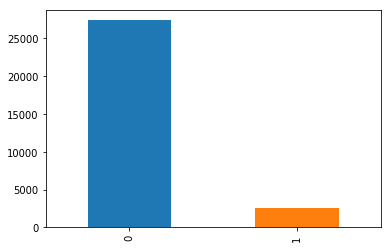

In [46]:
high_value_customer['chrun'].value_counts().plot(kind='bar')

In [66]:
requiredcols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6', 'total_og_mou_7','total_og_mou_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
churnedCust = high_value_customer.loc[high_value_customer['chrun']==1,requiredcols]
churnedCust['GoodPh_inc'] = churnedCust[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
churnedCust['GoodPh_out'] = churnedCust[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
churnedCust['GoodPh_2g'] = churnedCust[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
churnedCust['GoodPh_3g'] = churnedCust[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)



In [67]:
churnedCust.head()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,GoodPh_inc,GoodPh_out,GoodPh_2g,GoodPh_3g
7,626.46,558.04,428.74,487.53,609.24,350.16,0.00,0.0,0.0,0.0,0.0,0.0,592.250,548.385,0.00,0.0
97,32.04,67.84,32.16,511.16,465.91,231.03,0.00,0.0,0.0,0.0,0.0,0.0,49.940,488.535,0.00,0.0
111,217.04,75.59,0.00,102.01,18.33,0.00,284.50,0.0,0.0,0.0,0.0,0.0,146.315,60.170,142.25,0.0
143,93.88,8.41,0.00,1341.03,21.98,0.00,0.00,0.0,0.0,0.0,0.0,0.0,51.145,681.505,0.00,0.0
188,256.49,73.03,0.00,109.54,40.38,0.00,58.44,0.0,0.0,1522.4,0.0,0.0,164.760,74.960,29.22,761.2


Text(0.5,1,'Incoming Call usage - Good Phase vs Action Phase')

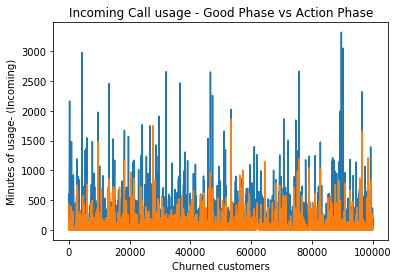

In [58]:
fig = plt.figure()
ax = plt.axes()
ax.plot(churnedCust[['GoodPh_inc','total_ic_mou_8']])
plt.xlabel('Churned customers')
plt.ylabel('Minutes of usage- (Incoming)')
plt.title('Incoming Call usage - Good Phase vs Action Phase')

Text(0.5,1,'Outgoing Call usage - Good Phase vs Action Phase')

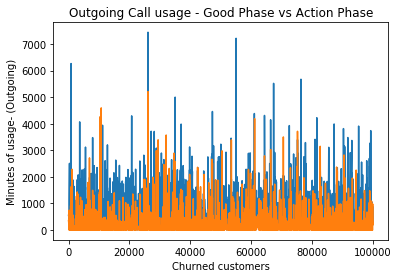

In [62]:
fig = plt.figure()
ax = plt.axes()
ax.plot(churnedCust[['GoodPh_out','total_og_mou_8']])
plt.xlabel('Churned customers')
plt.ylabel('Minutes of usage- (Outgoing)')
plt.title('Outgoing Call usage - Good Phase vs Action Phase')

Text(0.5,1,'2g Data usage - Good Phase vs Action Phase')

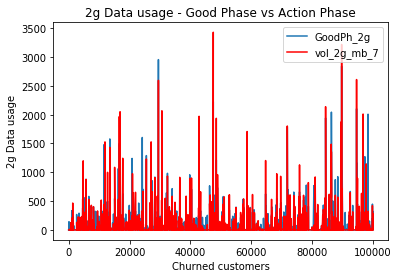

In [77]:
fig = plt.figure()
ax = plt.gca()
churnedCust.plot(kind='line', y='GoodPh_2g', ax=ax)
churnedCust.plot(kind='line', y='vol_2g_mb_7', color='red', ax=ax)
plt.xlabel('Churned customers')
plt.ylabel('2g Data usage')
plt.title('2g Data usage - Good Phase vs Action Phase')